In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
data=pd.read_csv("Body_Fat_Prediction .csv")
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
# Step 2: Explore the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None


In [4]:
# Step 3: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [5]:
# Step 5: Define features (X) and target (y)
X = data.drop('BodyFat', axis=1)  # Assuming 'BodyFat' is the target column
y = data['BodyFat']

In [6]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Step 8: Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "LightGBM Regression": LGBMRegressor(n_estimators=100, random_state=42),
    "SGD Regression": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
}

In [8]:
# Step 9: Train models, evaluate, and perform cross-validation
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5)
    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)
    
    # Store results
    results[name] = {
        "MSE": mse,
        "R2 Score": r2,
        "CV R2 Mean": cv_mean,
        "CV R2 Std": cv_std
    }

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 14
[LightGBM] [Info] Start training from score 19.435821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

c:\Users\hp\Desktop\Body_fat-prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\Body_fat-prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\Body_fat-prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\Body_fat-prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\hp\Desktop\Body_fat-prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRe


Comparative Analysis of Models:
                                   MSE  R2 Score  CV R2 Mean  CV R2 Std
Linear Regression             0.380312  0.991824    0.965777   0.040530
Ridge Regression              0.430493  0.990746    0.966153   0.037648
Lasso Regression              0.955676  0.979456    0.955449   0.026500
Decision Tree Regression      1.972353  0.957600    0.946930   0.049778
Random Forest Regression      0.050873  0.998906    0.965117   0.025920
Gradient Boosting Regression  0.082605  0.998224    0.961778   0.027858
LightGBM Regression           0.742091  0.984047    0.943633   0.023993
SGD Regression                0.426161  0.990839    0.966017   0.036229


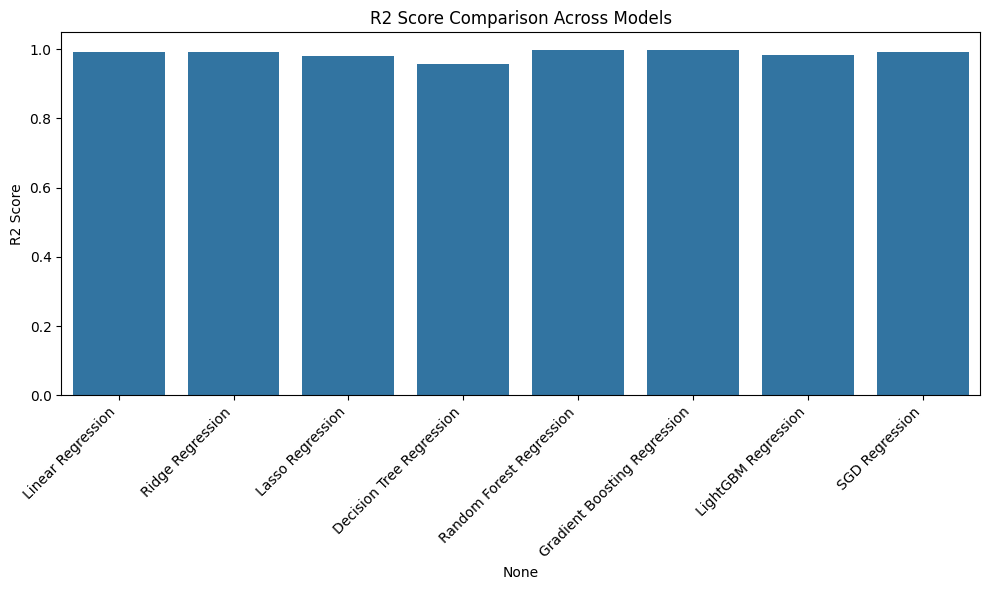

In [9]:
# Step 10: Display results
print("\nComparative Analysis of Models:")
results_df = pd.DataFrame(results).T
print(results_df)

# Step 11: Visualize the R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2 Score'])
plt.xticks(rotation=45, ha='right')
plt.title("R2 Score Comparison Across Models")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.show()

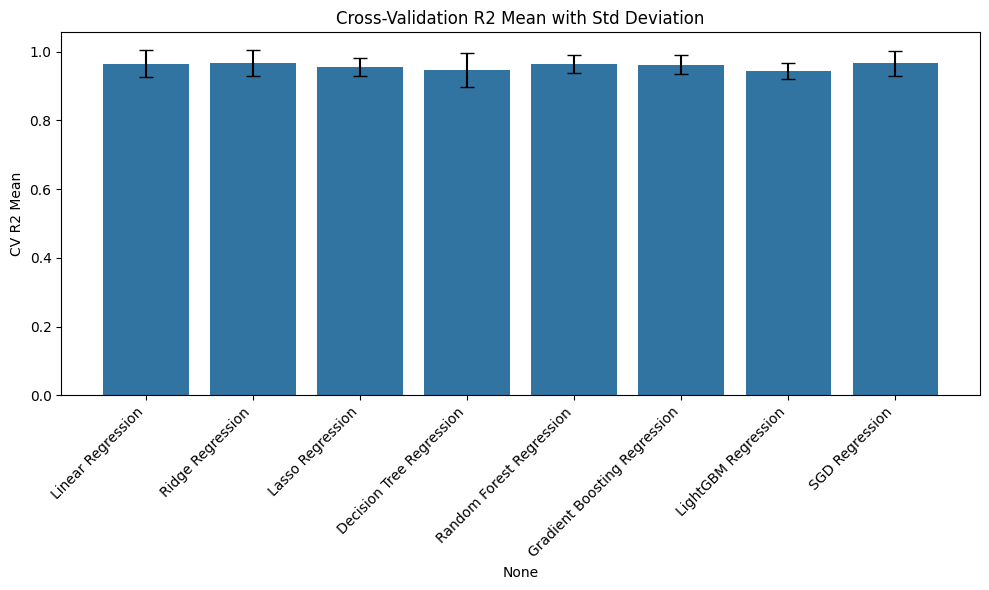


Best Model based on R2 Score: Random Forest Regression with R2 = 0.9989


In [10]:
# Step 12: Visualize cross-validation results
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['CV R2 Mean'])
plt.errorbar(x=results_df.index, y=results_df['CV R2 Mean'], yerr=results_df['CV R2 Std'], fmt='none', c='black', capsize=5)
plt.xticks(rotation=45, ha='right')
plt.title("Cross-Validation R2 Mean with Std Deviation")
plt.ylabel("CV R2 Mean")
plt.tight_layout()
plt.show()

# Step 13: Identify the best model based on R2 Score
best_model = results_df['R2 Score'].idxmax()
print(f"\nBest Model based on R2 Score: {best_model} with R2 = {results_df.loc[best_model, 'R2 Score']:.4f}")